In [2]:
import dimen_generation
import sys

In [4]:
# Load community embedding
vectors, metadata = dimen_generation.load_embedding()

In [5]:
dimen_generator = dimen_generation.DimenGenerator(vectors)

100060 valid directions, 100060 calculated.


In [6]:
# Generate dimensions through seed augmentation
dimensions = dimen_generator.generate_dimensions_from_seeds([
    ("teenagers", "RedditForGrownups"),
    ("AskMen", "AskWomen"),
    ("democrats", "Conservative"),
    ("vagabond", "backpacking"),
    ("AskMen", "AskMenOver30"),
    ("daddit", "Mommit"),
    ("hillaryclinton", "The_Donald"),
    ("nyc", "nycmeetups"),
    ("memes", "ImGoingToHellForThis"),
    ("PS3", "PS4")
])

In [7]:
# Print which seeds were found
dimen_names = ["age", "gender", "partisan", "affluence", "age B", "gender B", "partisan B", "sociality", "edginess", "time"]

for name, dimen in zip(dimen_names, dimensions):
    print("Dimension %s:" % name)
    print("\tSeed: %s" % dimen["seed"])
    print("\tFound seeds:")
    for c1, c2 in zip(dimen["left_comms"], dimen["right_comms"]):
        print("\t\t%s -> %s" % (c1, c2))

Dimension age:
	Seed: [('teenagers', 'RedditForGrownups')]
	Found seeds:
		teenagers -> RedditForGrownups
		youngatheists -> TrueAtheism
		teenrelationships -> relationship_advice
		AskMen -> AskMenOver30
		saplings -> eldertrees
		hsxc -> running
		trackandfield -> trailrunning
		TeenMFA -> MaleFashionMarket
		bapccanada -> canadacordcutters
		RedHotChiliPeppers -> pearljam
Dimension gender:
	Seed: [('AskMen', 'AskWomen')]
	Found seeds:
		AskMen -> AskWomen
		TrollYChromosome -> CraftyTrolls
		AskMenOver30 -> AskWomenOver30
		OneY -> women
		TallMeetTall -> bigboobproblems
		daddit -> Mommit
		ROTC -> USMilitarySO
		FierceFlow -> HaircareScience
		malelivingspace -> InteriorDesign
		predaddit -> BabyBumps
Dimension partisan:
	Seed: [('democrats', 'Conservative')]
	Found seeds:
		democrats -> Conservative
		GunsAreCool -> progun
		OpenChristian -> TrueChristian
		GamerGhazi -> KotakuInAction
		excatholic -> Catholicism
		EnoughLibertarianSpam -> ShitRConservativeSays
		AskAnAmerican ->

In [6]:
# Calculate scores for communities
scores = dimen_generation.score_embedding(vectors, zip(dimen_names, dimensions))
scores.head(5)

,age,gender,partisan,affluence,age B,gender B,partisan B,sociality,edginess,time
community,,,,,,,,,,
keto,0.177605,0.103089,-0.015497,0.282330,0.096337,0.118929,0.001137,0.023766,0.007077,-0.023099
AskReddit,-0.074154,0.130521,0.052819,0.151357,-0.145086,0.195407,0.021926,0.117152,0.013846,0.064513
funny,-0.005477,0.042535,0.062649,0.227850,-0.054822,0.081601,0.063919,-0.006446,0.067441,0.006465
politics,0.204567,0.078734,-0.071454,0.200739,0.188716,-0.002569,-0.118218,-0.204546,-0.005781,-0.007849
pics,0.109963,0.064870,0.057819,0.301407,0.038728,0.062879,0.071391,-0.137518,0.065246,-0.095829


<h2>Score domain vectors</h2>

In [102]:
import pandas as pd
domains_vectors = pd.read_csv('../embeddings/domains_clustered_vectors.tsv',sep='\t',header=None)
domains_meta = pd.read_csv('../embeddings/domains_clustered_meta.tsv',sep='\t')

In [103]:
domains_meta.rename(columns={'labels':'cluster_id'},inplace=True)
domains_meta.head()

,domain,cluster_id
0,.cbn.com,44
1,.folha.uol.com,14
2,1000bulbs.com,7
3,1001fonts.com,15
4,1001tracklists.com,2


In [95]:
domain_scores = dimen_generation.score_embedding(domains_vectors, zip(dimen_names, dimensions))
domain_scores.head()
domains_meta = pd.concat([domains_meta,domain_scores],axis=1)

In [24]:
avg_label_scores = domains_meta.groupby('labels')[dimen_names].mean()

In [104]:
label_list = ['Religious','DYL, 3d Printing','Hypebeast (Young men\'s fashion) ?','Elon Musk (SpaceX/Tesla) ??','Main Stream Retail','Video Games 1 ','Science News ??','Furniture','Art (Anime)','Photography','Self Improvement ??','Tech (Networking)','Tech (Graphics Cards)','Tech (Audio)','Brazil','Art (Videogames)', 'Board Games', 'Fashion 1','Sports','Popular Websites','Racing (Nascar/Formula 1)','Pornography 1','Cars','Mexico','Musicians','Tech (Cellular)','India','Video Games 2','Soccer', 'Latin America','Card Games','News 1','Bicycles','Tech (PC Builds/OS)','Adult','International (Travel)','Australia (New Zealand)','Movie Review','Pornography 2','Investing (Finance)','Asian News','Firearms','Beauty Supply','Crypto','News 2','Combat Sports??','Canada','Pens/Watches','Cooking','Coding']
desc_dict = dict(zip(list(range(50)),label_list))
domains_meta['cluster_name'] = [desc_dict[val] for val in domains_meta['cluster_id'].values]

In [105]:
domains_meta[['domain','cluster_id','cluster_name']].to_csv('../data/csv/clustering/2019_50_kmeans.csv',index=False,header=True)

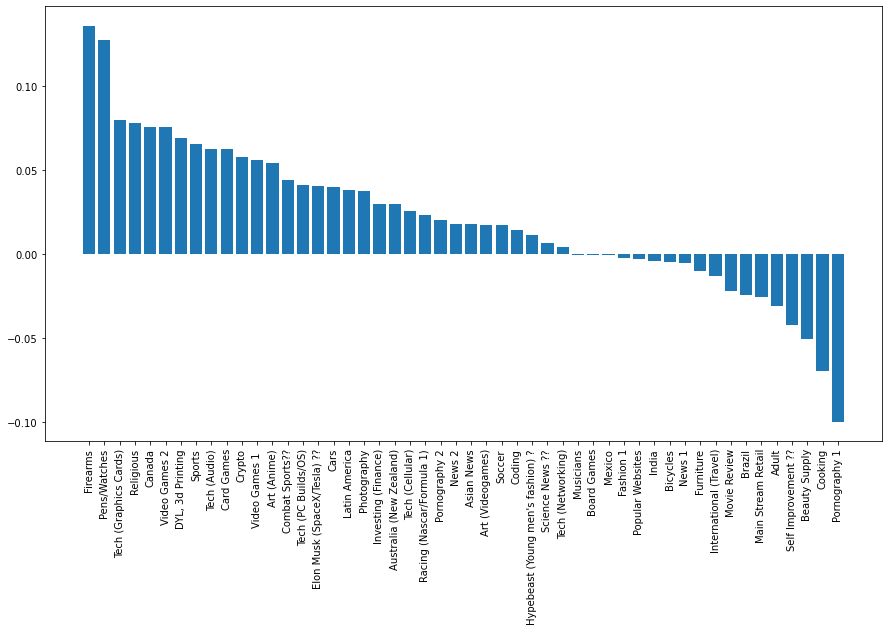

In [42]:
var = 'partisan'
avg_score_vals = avg_label_scores[var].sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.bar(height=avg_score_vals,x=list(range(50)),tick_label=[label_list[int(val)] for val in avg_score_vals.index])
plt.xticks(rotation = 90)
plt.show()
#plt.hist(avg_score_vals.values,bins=50)

<h2>Many dimension distribution plot</h2>

In [5]:
import sys
import os
sys.path.append("..")

%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

%load_ext autoreload
%autoreload 2
from commembed.jupyter import *
from commembed.plots.social_dimensions import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


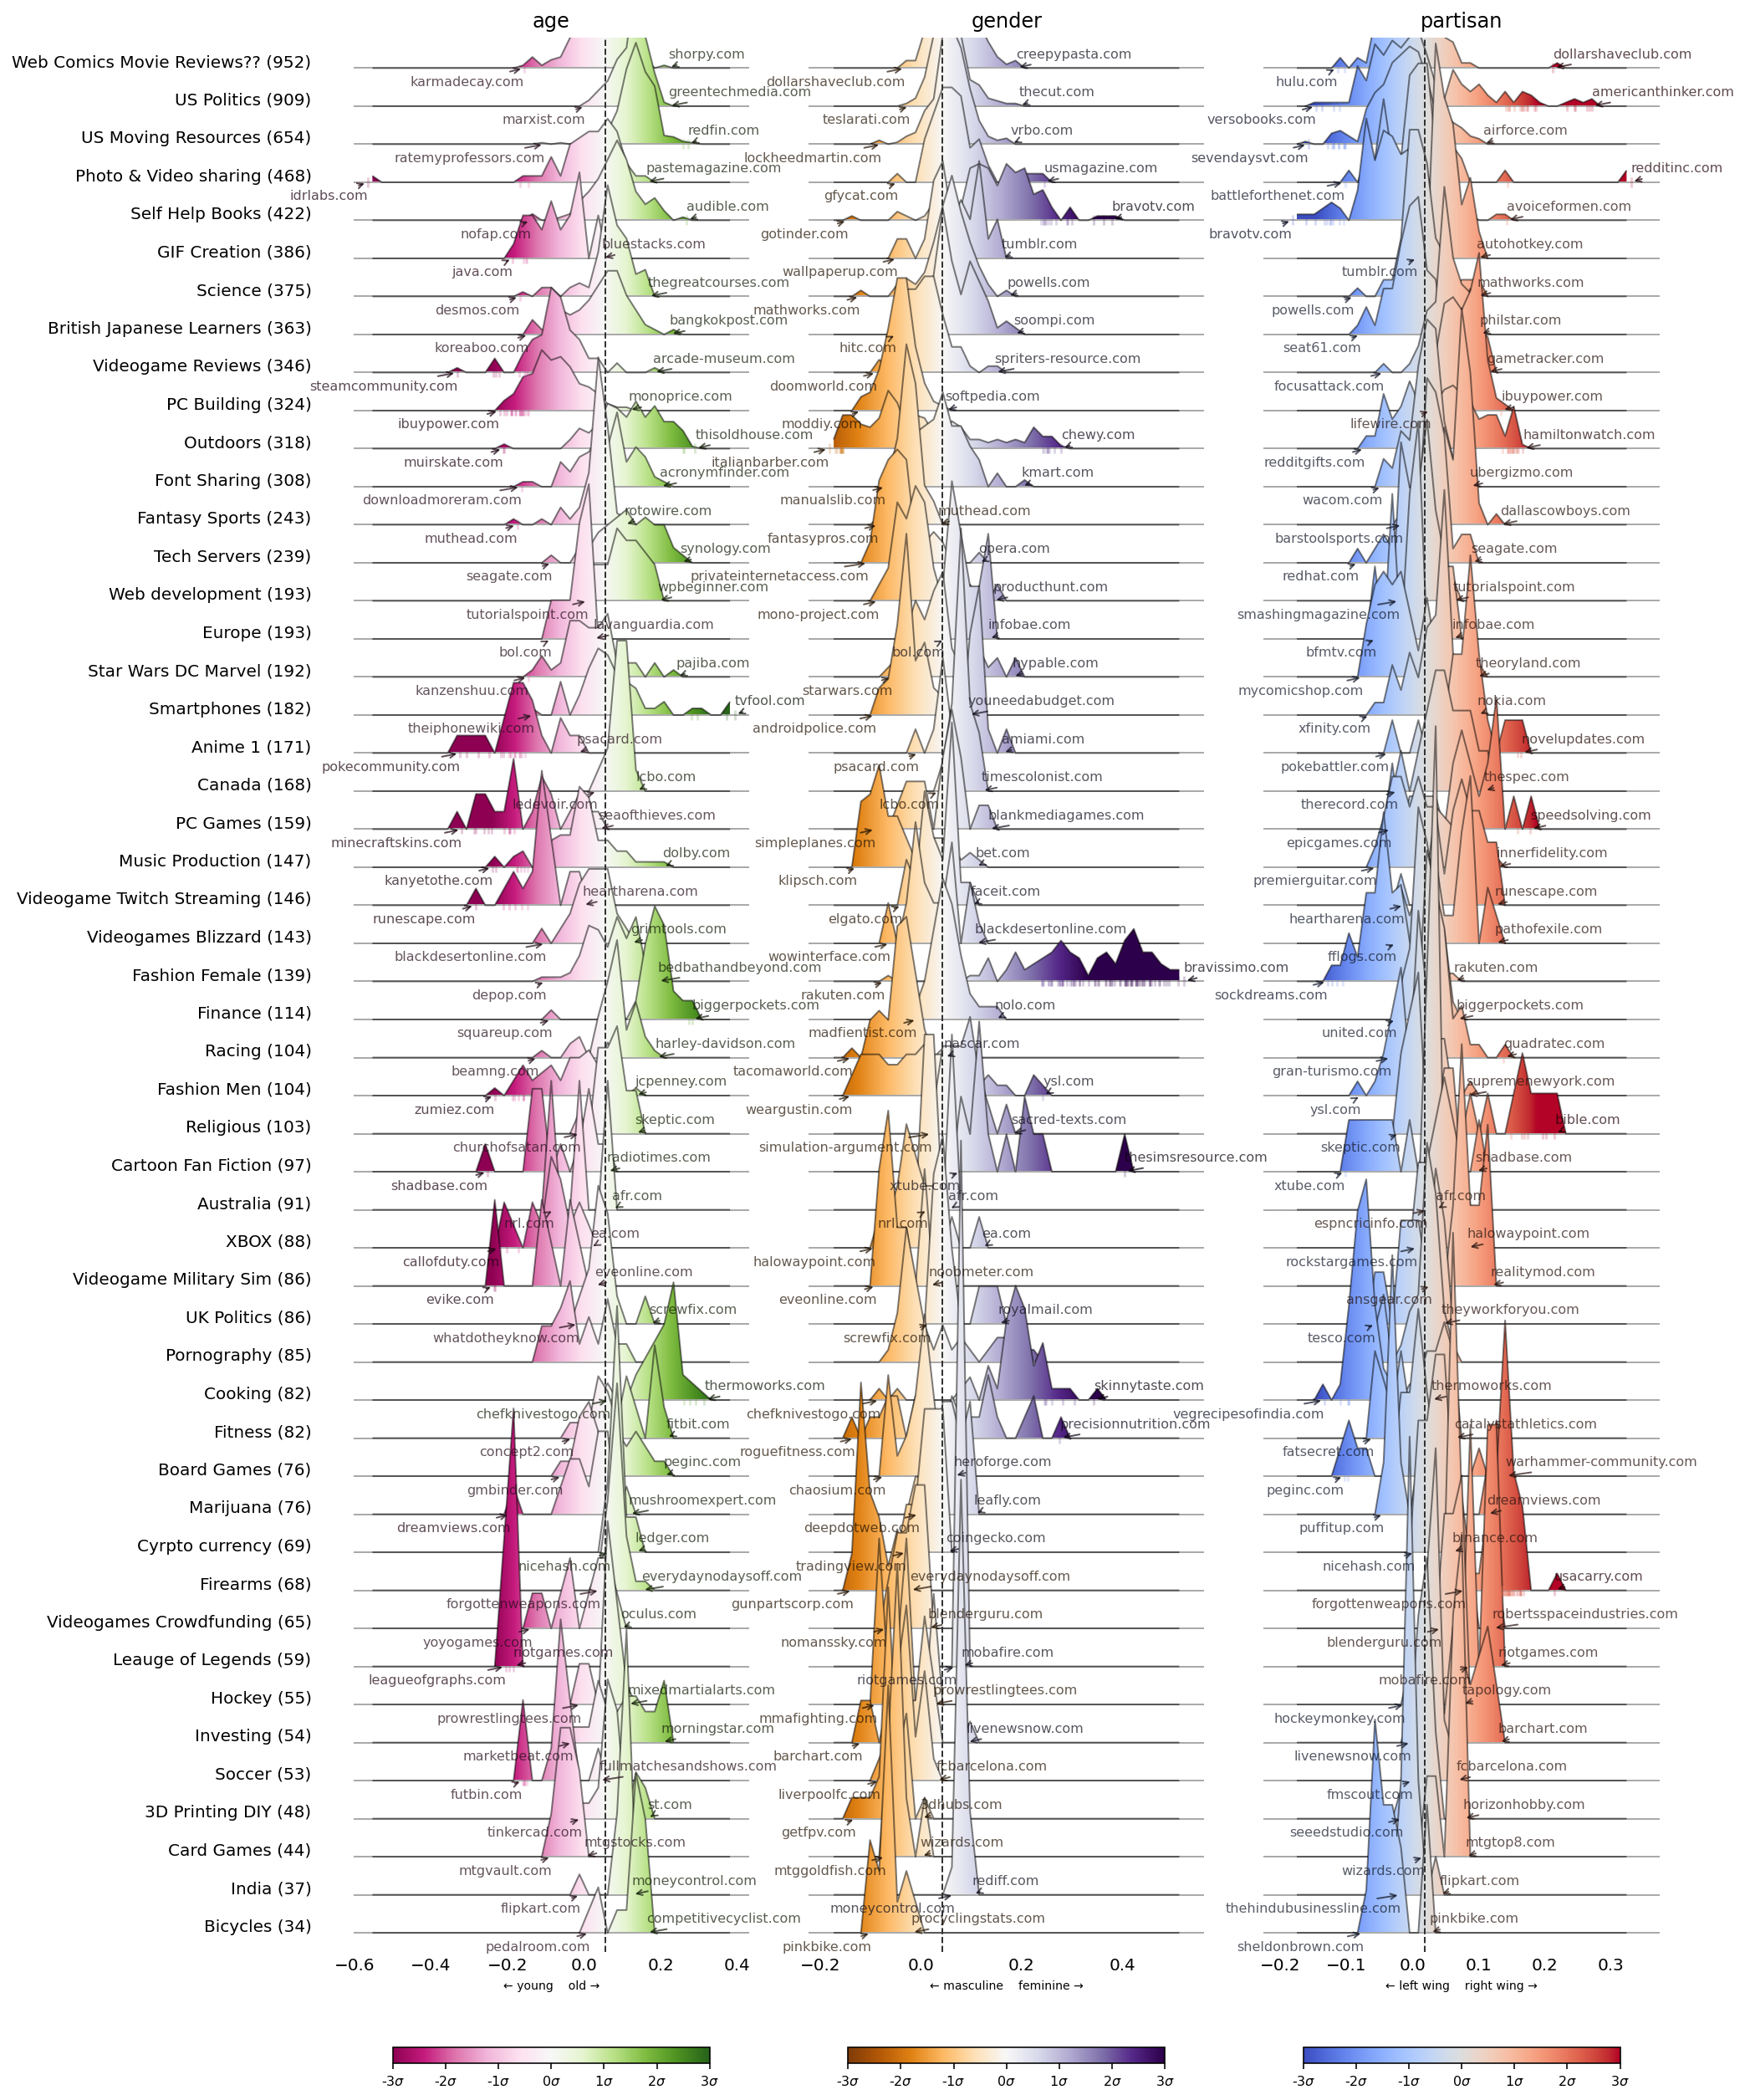

In [10]:
many_densities_plot(['age', 'gender', 'partisan'], clustering_name='~/domain_embeddings/data/csv/clustering/filtered_50_cluster_file.csv',percentilize=False, single_column=False)
plt.show()
#plt.savefig('../plots/dimension_distribution_all_comments_10k_hosts.png',facecolor='white')

<h2>Dimension correlation</h2>

In [1]:
import pandas as pd
domains_vectors = pd.read_csv('../embeddings/all_filtered_vecs.tsv',sep='\t',header=None)
domains_meta = pd.read_csv('../embeddings/all_filtered_meta.tsv',sep='\t')

In [8]:
domain_scores = dimen_generation.score_embedding(domains_vectors, zip(dimen_names, dimensions))
domain_scores.head()
domains_meta = pd.concat([domains_meta,domain_scores],axis=1)

In [9]:
domains_meta.set_index('host',inplace=True)
domains_meta.head()

,labels,cluster_name,age,gender,partisan,affluence,age B,gender B,partisan B,sociality,edginess,time
host,,,,,,,,,,,,
youtube.com,34,GIF Creation,-0.045901,0.050643,0.063806,0.122398,-0.058831,0.114118,0.054890,0.024409,0.059929,0.127169
imgur.com,16,Photo & Video sharing,-0.045329,0.067665,0.060603,0.136530,-0.053787,0.109884,0.062619,0.057638,0.034115,0.152476
i.imgur.com,16,Photo & Video sharing,-0.052942,0.057445,0.067594,0.132505,-0.067625,0.112952,0.060202,0.033528,0.059959,0.134827
youtu.be,16,Photo & Video sharing,-0.042271,0.045512,0.052214,0.105813,-0.038950,0.102902,0.080659,0.035683,0.026778,0.164521
en.wikipedia.org,26,Science,0.051354,0.067729,0.036518,0.150847,0.014290,0.125897,0.039310,-0.055201,0.070230,0.073677


In [12]:
dimens = domains_meta.columns[3:]
avg_scores = domains_meta.groupby('cluster_name')[dimens].mean()
avg_scores.head()

,gender,partisan,affluence,age B,gender B,partisan B,sociality,edginess,time
cluster_name,,,,,,,,,
3D Printing DIY,-0.062217,0.025247,0.160756,0.080243,-0.069305,0.063703,-0.036216,-0.008901,0.067230
Anime 1,0.118100,0.069046,-0.009800,-0.126250,0.144944,0.041527,0.108963,0.002228,0.155674
Australia,0.090696,0.018711,0.127538,0.011681,0.133181,0.038526,-0.000375,0.049068,0.063696
Bicycles,-0.067675,-0.030121,0.235813,0.082475,-0.031604,-0.035437,-0.071323,0.078133,-0.017894
Board Games,-0.009221,0.012593,0.015652,-0.021047,-0.016997,-0.016709,0.050503,-0.082678,0.078639


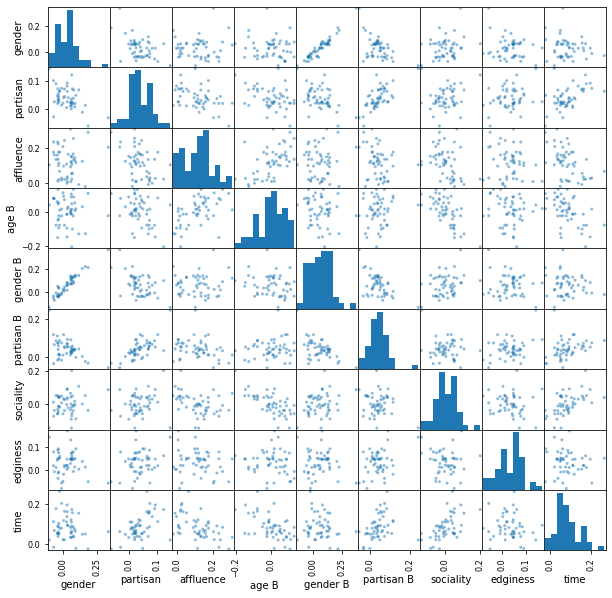

In [26]:
pd.plotting.scatter_matrix(avg_scores,figsize=(10,10))
plt.show()

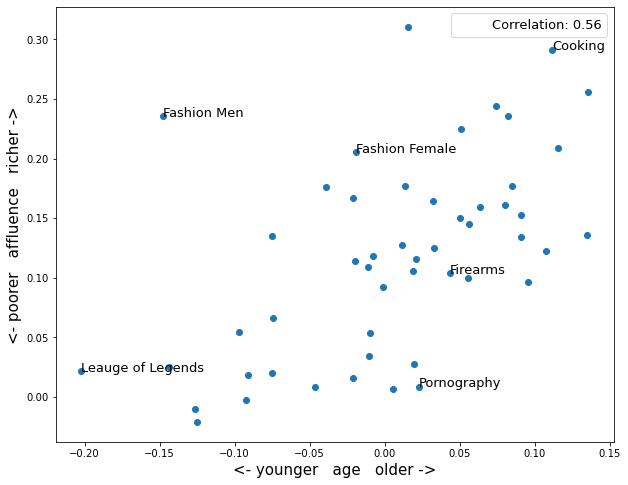

In [68]:
ind = 'age B'
dep = 'affluence'
ind_name = ind.split(' ')[0]
dep_name = dep.split(' ')[0]


directions = {'gender': ('male','female'),'partisan': ('left','right'),'affluence':('poorer','richer'),'time':('old','new'),'age':('younger','older')}

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(avg_scores[ind],avg_scores[dep])
groups_to_annotate = ['Firearms','Pornography','Cooking','Leauge of Legends','Fashion Men','Fashion Female']
for group in groups_to_annotate:
    vals = avg_scores.loc[group]
    point = (vals[ind],vals[dep])
    plt.annotate(group,point,fontsize=13)
corr=np.corrcoef(avg_scores[ind],avg_scores[dep])[0][1]
#plt.title('Cluster Correlation Coeff between {} and {}: {}'.format(ind,dep,corr))
# Create empty plot with blank marker containing the extra label
plt.plot([], [], ' ', label="Correlation: {}".format(round(corr,2)))
plt.legend(fontsize=13)
plt.ylabel('<- {}   {}   {} ->'.format(directions[dep_name][0],dep_name,directions[dep_name][1]),fontsize=15)
plt.xlabel('<- {}   {}   {} ->'.format(directions[ind_name][0],ind_name,directions[ind_name][1]),fontsize=15)
plt.show()

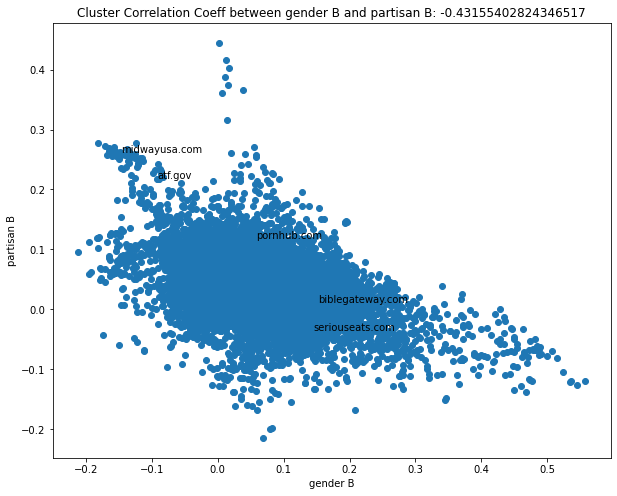

In [38]:
ind = 'gender B'
dep = 'partisan B' 
plt.figure(figsize=(10,8))
plt.scatter(domains_meta[ind],domains_meta[dep])

hosts_to_annotate = ['biblegateway.com','pornhub.com','seriouseats.com','midwayusa.com','atf.gov']
for host in hosts_to_annotate:
    vals = domains_meta.loc[host]
    point = (vals[ind],vals[dep])
    plt.annotate(host,point)
corr=np.corrcoef(domains_meta[ind],domains_meta[dep])[0][1]
plt.title('Cluster Correlation Coeff between {} and {}: {}'.format(ind,dep,corr))
plt.ylabel(dep)
plt.xlabel(ind)
plt.show()